<a href="https://colab.research.google.com/github/uteyechea/crime-prediction-using-artificial-intelligence/blob/master/spatial_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import gc

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib. pyplot as plt
from collections import defaultdict

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path='/content/drive/My Drive/Colab Notebooks/crime_prediction'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
file_path=os.path.join(path,'data','CLEAR.csv')

In [ ]:
file=pd.read_csv(file_path,sep=',',parse_dates=['Date'])

In [ ]:
file['Date']=pd.to_datetime(file['Date'].dt.strftime('%Y-%m-%d'))

In [ ]:
file

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.764002,-87.656290
1,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.862175,-87.711496
2,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,41.804197,-87.626096
3,2001-01-01,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,41.812451,-87.694479
4,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.963238,-87.778194
...,...,...,...,...,...,...,...,...
6472799,2020-07-08,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,41.954344,-87.664922
6472800,2020-07-08,THEFT,OVER $500,RESIDENCE,False,False,41.754333,-87.613790
6472801,2020-07-08,ROBBERY,AGGRAVATED,STREET,False,False,41.795364,-87.599238
6472802,2020-07-08,DECEPTIVE PRACTICE,COMPUTER FRAUD,CONVENIENCE STORE,False,False,41.953853,-87.713208


In [ ]:
location={
    'Longitude': file.loc[:,'Longitude'],
    'Latitude': file.loc[:,'Latitude']
         }

In [ ]:
location=pd.DataFrame(location)

In [ ]:
location

,Longitude,Latitude
0,-87.656290,41.764002
1,-87.711496,41.862175
2,-87.626096,41.804197
3,-87.694479,41.812451
4,-87.778194,41.963238
...,...,...
6472799,-87.664922,41.954344
6472800,-87.613790,41.754333
6472801,-87.599238,41.795364
6472802,-87.713208,41.953853


In [ ]:
#Fit the data.
kmeans = KMeans(n_clusters=20)
kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Learn the labels.
labels = kmeans.predict(location)
centroids = kmeans.cluster_centers_

In [ ]:
file['Zone']=list(labels) #Insert new dictinary key zone, where longitude,latitude map to zone using k-means

In [ ]:
file

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Zone
0,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.764002,-87.656290,16
1,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.862175,-87.711496,9
2,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,41.804197,-87.626096,11
3,2001-01-01,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,41.812451,-87.694479,2
4,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.963238,-87.778194,5
...,...,...,...,...,...,...,...,...,...
6472799,2020-07-08,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,41.954344,-87.664922,3
6472800,2020-07-08,THEFT,OVER $500,RESIDENCE,False,False,41.754333,-87.613790,7
6472801,2020-07-08,ROBBERY,AGGRAVATED,STREET,False,False,41.795364,-87.599238,11
6472802,2020-07-08,DECEPTIVE PRACTICE,COMPUTER FRAUD,CONVENIENCE STORE,False,False,41.953853,-87.713208,13


In [ ]:
theft={}
theft['Date']=file[file['Primary Type']=='THEFT'].loc[:,'Date']
theft['Zone']=file[file['Primary Type']=='THEFT'].loc[:,'Zone']

In [ ]:
theft={}
theft['Date']=file[file['Primary Type']=='THEFT'].loc[:,'Date']

zones=set(labels)
for element in zones:
  if element>=2:
    theft['zone'+str(element)]=file[file['Zone']== element ].loc[:,'Zone']/element
  else:
    theft['zone'+str(element)]=file[file['Zone']== element ].loc[:,'Zone']

In [ ]:
theft=pd.DataFrame(theft)
theft=theft.groupby(['Date']).sum()
theft

,zone0,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10,zone11,zone12,zone13,zone14,zone15,zone16,zone17,zone18,zone19
Date,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,13.0,12.0,6.0,0.0,12.0,3.0,6.0,10.0,11.0,6.0,7.0,1.0,5.0,2.0,5.0,11.0,4.0,3.0,11.0
2001-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2001-01-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-04,0.0,6.0,5.0,10.0,0.0,1.0,2.0,3.0,7.0,7.0,4.0,5.0,2.0,7.0,0.0,6.0,4.0,7.0,3.0,12.0
2020-07-05,0.0,0.0,8.0,6.0,0.0,2.0,3.0,10.0,3.0,5.0,2.0,7.0,1.0,2.0,1.0,5.0,5.0,1.0,2.0,13.0
2020-07-06,0.0,3.0,7.0,12.0,0.0,6.0,5.0,12.0,5.0,5.0,2.0,10.0,2.0,4.0,1.0,10.0,4.0,10.0,2.0,13.0


Nomalize data

In [ ]:
theft = (theft - theft.mean() ) / theft.std()
theft

,zone0,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10,zone11,zone12,zone13,zone14,zone15,zone16,zone17,zone18,zone19
Date,,,,,,,,,,,,,,,,,,,,
2001-01-01,NaN,1.028810,0.264460,-1.452350,-0.050849,0.658983,-1.352133,-1.001968,0.471272,0.194100,-0.315154,-0.610863,-1.546838,-0.736737,-0.049163,-0.866708,0.076976,-1.509690,-0.794576,-1.647319
2001-01-02,NaN,-1.835100,-2.006852,-2.242696,-0.050849,-1.884691,-1.995929,-1.939584,-1.999350,-1.827783,-1.575092,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-1.826670,-1.432137,-2.537583
2001-01-03,NaN,-1.835100,-2.006852,-2.242696,-0.050849,-1.672718,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
2001-01-05,NaN,-1.614799,-2.006852,-2.242696,-0.050849,-1.884691,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
2001-01-06,NaN,-1.835100,-1.817576,-2.242696,-0.050849,-1.884691,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-04,NaN,-0.513295,-1.060472,-0.925453,-0.050849,-1.672718,-1.566732,-1.564538,-0.269914,-0.614653,-0.819129,-1.006123,-1.295207,-0.249816,-1.258758,-0.643157,-1.307215,-1.034221,-0.794576,-1.566386
2020-07-05,NaN,-1.835100,-0.492644,-1.452350,-0.050849,-1.460745,-1.352133,-0.251875,-1.258164,-1.019030,-1.323105,-0.610863,-1.546838,-1.467119,-0.653960,-0.866708,-1.109473,-1.985160,-1.113357,-1.485453
2020-07-06,NaN,-1.174198,-0.681920,-0.662004,-0.050849,-0.612854,-0.922936,0.123171,-0.764039,-1.019030,-1.323105,-0.017971,-1.295207,-0.980198,-0.653960,0.251047,-1.307215,-0.558751,-1.113357,-1.485453


In [ ]:
theft=theft.dropna(axis='columns') #removed dead zone zone 0

In [ ]:
theft

,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10,zone11,zone12,zone13,zone14,zone15,zone16,zone17,zone18,zone19
Date,,,,,,,,,,,,,,,,,,,
2001-01-01,1.028810,0.264460,-1.452350,-0.050849,0.658983,-1.352133,-1.001968,0.471272,0.194100,-0.315154,-0.610863,-1.546838,-0.736737,-0.049163,-0.866708,0.076976,-1.509690,-0.794576,-1.647319
2001-01-02,-1.835100,-2.006852,-2.242696,-0.050849,-1.884691,-1.995929,-1.939584,-1.999350,-1.827783,-1.575092,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-1.826670,-1.432137,-2.537583
2001-01-03,-1.835100,-2.006852,-2.242696,-0.050849,-1.672718,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
2001-01-05,-1.614799,-2.006852,-2.242696,-0.050849,-1.884691,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
2001-01-06,-1.835100,-1.817576,-2.242696,-0.050849,-1.884691,-1.995929,-2.127107,-1.999350,-2.029971,-1.827080,-1.994275,-1.798469,-1.954041,-1.258758,-1.984463,-2.098181,-2.143650,-1.750917,-2.537583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-04,-0.513295,-1.060472,-0.925453,-0.050849,-1.672718,-1.566732,-1.564538,-0.269914,-0.614653,-0.819129,-1.006123,-1.295207,-0.249816,-1.258758,-0.643157,-1.307215,-1.034221,-0.794576,-1.566386
2020-07-05,-1.835100,-0.492644,-1.452350,-0.050849,-1.460745,-1.352133,-0.251875,-1.258164,-1.019030,-1.323105,-0.610863,-1.546838,-1.467119,-0.653960,-0.866708,-1.109473,-1.985160,-1.113357,-1.485453
2020-07-06,-1.174198,-0.681920,-0.662004,-0.050849,-0.612854,-0.922936,0.123171,-0.764039,-1.019030,-1.323105,-0.017971,-1.295207,-0.980198,-0.653960,0.251047,-1.307215,-0.558751,-1.113357,-1.485453


In [ ]:
file_path = os.path.join(path,'data','theft.csv')
theft.to_csv(file_path,index=True)

In [ ]:
colmap={1:'k',2:'g',3:'b',4:'c',5:'m',6:'y',7:'r',\
        8:'chartreuse',9:'gold',10:'darkkhaki',\
        11:'olivedrab',12:'royalblue',13:'lightseagreen',\
        14:'darkorchid',15:'plum',16:'palevioletred',\
        17:'crimson',18:'tomato',19:'darkorange',\
        20:'orangered'
        }



(-88.0, -87.4)

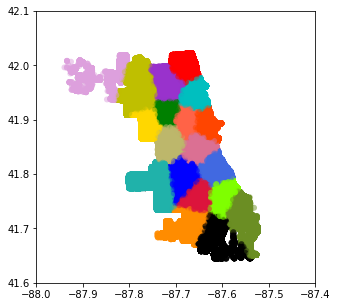

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(location['Longitude'], location['Latitude'], color=colors, alpha=0.5, edgecolor='none')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.ylim(41.6, 42.1)
plt.xlim(-88, -87.4)
#plt.show()